# Exploratory data analysis 
This notebook shows the initial exploratory data analysis to analyse the survey data and to check if there are any odd or missing values. Moreover, this notebook also shows the MSOA regions on a map.

## 0. Data Preperation before exploration

In this section, packages are imported, functions are created and necessary files are read.

### 0.1 Packages

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

### 0.2 Files

In [2]:
#This is the final survey file with the merged MSOA names
merged_names=pd.read_csv('../datafiles/merged_names.csv')
#This dataframe contains the geodata for the UK 
gdf = gpd.read_file("../shapefiles/UK_plot/infuse_msoa_lyr_2011.shp")
#Base region of Norfolk/Suffolk
ns_region = pd.read_csv('../datafiles/norfolk_suffolk_region.csv')
#Base region of Somerset
somerset_region= pd.read_csv('../datafiles/somerset_region.csv')
#Base region of London
london_region=pd.read_csv('../datafiles/london_region.csv')
#The London boroughs shapefile, for better visualisation 
london_borough=gpd.read_file('../shapefiles/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')
#Survey data files with the split for the regions
filtered_ns = pd.read_csv('../datafiles/filtered_ns.csv')
filtered_somerset= pd.read_csv('../datafiles/filtered_somerset.csv')
filtered_london=pd.read_csv('../datafiles/filtered_london.csv')

### 0.3 Renaming columns
In this section, columns are renamed if necessary. This is needed for merging later on. 

In [3]:
gdf=gdf.rename(columns={'geo_label': 'MSOA name'})
london_borough=london_borough.rename(columns={'NAME': 'LA name'})

## 1. Exploratory Data Analysis on Survey

### 1.1 Survey data information

First, let's have a look at the survey data. 

In [4]:
merged_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Columns: 321 entries, ID to MSOA name
dtypes: float64(3), int64(183), object(135)
memory usage: 1.8+ MB


The dataframe has 321 columns and 743 entries, one column being the merged MSOA names from Step0DataPreperation. The types of the columns range from float, integer to object. 

### 1.2 Missing values

These are the missing values in the survey dataframe.

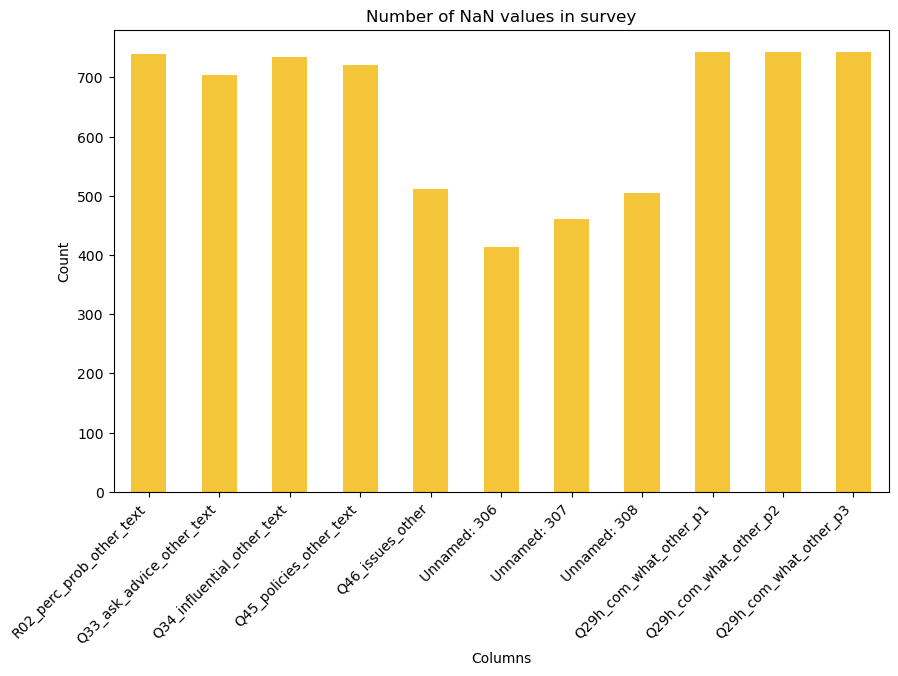

In [5]:
plt.figure(figsize=(10,6))

ax = merged_names.isna().sum()
#Shows only the columns that have missing values
ax = ax[ax > 0]  
ax.plot(kind='bar', color='#f4c539')

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Number of NaN values in survey')

# Rotate x-axis labels 45 degrees
plt.xticks(rotation=45, ha='right') 

# Show the plot
plt.show()

In [6]:
any_missing = merged_names.isna().any(axis=1).sum()
print('The dataframe survey has', any_missing, 'entries with any missing values')

The dataframe survey has 743 entries with any missing values


In [7]:
all_missing = merged_names.isna().all(axis=1).sum()
print('The dataframe survey has', all_missing, 'entries with all missing values')

The dataframe survey has 0 entries with all missing values


These missing values belong to multiple choice answers of questions where the last option is "other". This gives people the opportunity that if they do not feel like the right answer is in the multiple choice answers, they can click the last option "other" and write something. Hence, this column is often left empty as it is not always neccessary. All the column names that have the name "other" in Figure 1 belong to this case. The columns with the name "Unnamed" belong to the social influence section to Question 29,  and asks for three people who you discuss flood-related issues with (hence three columns Unnamed 306,307 and 308). 

It is good to note that all 743 entries have missing values, as the option other for columns is not always used. 

### 1.3 Type Object Columns

Moreover, I want to dive into the columns that have type "object".

In [8]:
#Selecting the columns in the survey that have type object
object_columns = merged_names.select_dtypes(include=['object'])

In [9]:
object_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Columns: 135 entries, Q5b_home_sell to MSOA name
dtypes: object(135)
memory usage: 783.8+ KB


For many columns, it is the empty strings that turn the type of the column into object, as the rest of the entries are integers. There are also columns that require text as answers, those columns then indeed have string answers hence the type object is applicable. I want to count how many empty strings these columns have.  

In [10]:
# Let's count empty strings in each object column. Sum up the number of empty strings for each column
empty_counts = (object_columns == ' ').sum()

In [11]:
# Printing the number of empty string entries for each object type column
for column, count in empty_counts.items():
    print(f"{column}: {count}")

Q5b_home_sell: 248
Q11a_hazard_type1: 719
Q11a_hazard_type3: 719
Q11a_hazard_type4: 719
Q11a_hazard_type5: 719
Q11a_hazard_type10: 719
Q11a_hazard_type6: 719
Q11a_hazard_type9: 719
Q11a_hazard_not_say: 719
R02_perc_prob_other_text: 0
Q18a_flood_where: 609
Q18b_flood_year: 609
Q18d_flood_cost: 652
R03_perc_damage_UK1: 614
R03_perc_damage_UK2: 487
R03_perc_damage_UK3: 385
R1a_self_efficacy_SM8: 487
R1b_resp_efficacy_SM8: 487
R1c_perc_cost_SM8: 487
R2_implementation_SM8: 487
Q41a_property_UK: 305
Q41a_possessions_UK: 305
Q41b_ins_intention_UK: 438
Q41c_ins_self_efficacy_UK: 438
Q25a_fl_convo_local: 555
Q27_fl_convo_people: 515
Q28_convo_resp_efficacy: 557
Q28_convo_costs: 557
Q28_convo_prob: 557
Q28_convo_severity: 557
Q28_convo_worry: 557
Q28_convo_community: 557
Q28_convo_gov: 557
Q29a_adapt_p1: 407
Q29a_adapt_p2: 456
Q29a_adapt_p3: 498
Q29d_distance_p1: 407
Q29d_distance_p2: 456
Q29d_distance_p3: 498
Q29f_com_freq_p1: 407
Q29f_com_freq_p2: 456
Q29f_com_freq_p3: 498
Q29g_flood_com_freq_

The object columns often have empty strings instead of missing values, because some questions were not relevant for the area of the respondent and thus entered an empty string for that respondent if it wasn't applicable. Moreover, some questions have follow-up questions if a specific answer was clicked, hence if the follow-up questions were not asked an empty string is set as the answer to those follow-up questions. This is good to take into account for futher analysis when choosing variables. 

For each sub-question, the necessary variables will be selected. It is interesting to note that most data is either categorical, binary or ordinal, with a few exceptions being ratio data. 

## 2. UK plot of survey data


I want to plot the survey regions on the UK map, so I can show the location of the three regions relative to the UK. This is done in this section. 

### 2.1 Merging data 
I need to merge the data first before plotting.

In [12]:
#Choosing only geometry and MSOA columns in gdf for merging as I don't need more
gdf=gdf[['MSOA name', 'geometry']]
# Setting the MSOA name column to string to ensure proper merging
gdf['MSOA name'] = gdf['MSOA name'].astype('str')

In [13]:
# Setting the MSOA name column to string to ensure proper merging
merged_names['MSOA name'] = merged_names['MSOA name'].astype('str')

In [14]:
#Merging shapefile and dataframe
merged_df=gdf.merge(merged_names, on='MSOA name', how='right')

In [15]:
#This is the merged dataframe for the survey data
merged_df.head()

,MSOA name,geometry,ID,Q0_place_UK,Q1_home_NL_UK,Q4_home_size_UK,Q5_home_tenure,Q5b_home_sell,Q6_home_costs,Q7_move_in,...,Q29h_com_what_other_p2,Q29h_com_what_other_p3,Q35_responsibility_citizens,Q35_responsibility_business,Q35_responsibility_ngo_local,Q35_responsibility_ngo_international,Q35_responsibility_gov_local,Q35_responsibility_gov_national,Q35_responsibility_w_authorities,Q35_responsibility_other
0,North Norfolk 012,"POLYGON ((623763.31 326443.098, 623755.718 326...",0,5456,4,2,2,350000,300,2015,...,NaN,NaN,0,0,0,0,0,100,0,0
1,North Norfolk 007,"POLYGON ((627095.125 335493.281, 627095.13 335...",1,5451,3,2,2,350000,3000,1998,...,NaN,NaN,0,0,0,0,50,0,50,0
2,Waveney 006,"POLYGON ((650711.563 293219.281, 650714.125 29...",2,6170,3,5,2,265000,300,2012,...,NaN,NaN,10,0,0,10,50,0,30,0
3,Babergh 011,"POLYGON ((615539.375 238168.4, 615543.72 23816...",3,6101,3,6,2,550000,3000,2019,...,NaN,NaN,0,0,0,0,100,0,0,0
4,Suffolk Coastal 011,"POLYGON ((619891.047 244164.338, 619891.422 24...",4,6160,4,6,2,385000,280,2000,...,NaN,NaN,0,0,0,0,30,35,35,0


In [16]:
#Only selecting the regions of Norfolk/Suffolk in the gdf dataframe
gdf_ns=gdf[gdf['MSOA name'].isin(ns_region['MSOA name'])]
#Only selecting the regions of Somerset in the gdf dataframe
gdf_somerset=gdf[gdf['MSOA name'].isin(somerset_region['MSOA name'])]
#Only selecting the regions of Greater London in the gdf dataframe
gdf_london=gdf[gdf['MSOA name'].isin(london_region['MSOA name'])]

In [17]:
# Merging Local Authorities  with MSOA's for better plotting of Greater London
filtered_london = london_region.merge(filtered_london, on = 'MSOA name', how='right')

In [18]:
#Merging the gdf dataframe for the three different areas with the filtered dataframes from the survey data
merged_ns=gdf_ns.merge(filtered_ns, on='MSOA name', how='right')
merged_somerset=gdf_somerset.merge(filtered_somerset, on='MSOA name', how='right')
merged_london=gdf_london.merge(filtered_london, on='MSOA name', how='right')

### 2.2 Plotting with zoom into the regions

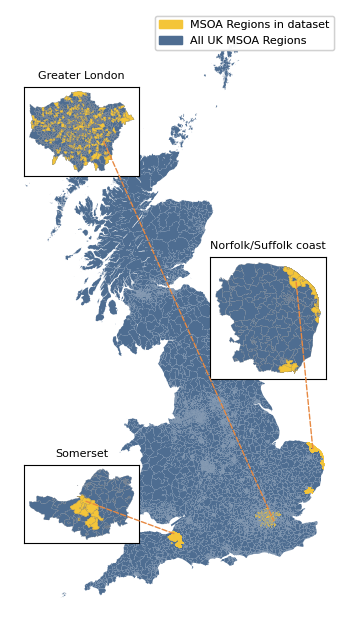

In [19]:
# This is to set up the main plot
fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, color='#4e6d91', edgecolor='none')

# To draw the different regions on the main map
merged_ns.plot(ax=ax, color='#f4c539', edgecolor='none')
merged_somerset.plot(ax=ax, color='#f4c539', edgecolor='none')
merged_london.plot(ax=ax, color='#f4c539', edgecolor='none')

#This creates a manual legend together with the appropiate color and label. 
reg_legend = ax.legend(handles=
                       [mpatches.Patch(color='#f4c539', label='MSOA Regions in dataset'),
                       mpatches.Patch(color='#4e6d91', label='All UK MSOA Regions'),], loc='upper right' , fontsize=8)

#This adds the legend to the plot
ax.add_artist(reg_legend)

#Setting the axis off of the main plot
ax.set_axis_off()

# Creating inset axis for Norfolk/Suffolk coast, plotting the MSOA regions from the survey on the base 
# regions. 
inset_ns= inset_axes(ax, width="35%", height="35%", loc='center right', borderpad=1)
gdf_ns.plot(ax=inset_ns, color='#4e6d91',  edgecolor='grey', linewidth=0.1)
merged_ns.plot(ax=inset_ns, color='#f4c539', edgecolor='grey', linewidth=0.1)
#Removing the ticks from the axes 
inset_ns.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
#Setting title
inset_ns.set_title("Norfolk/Suffolk coast", fontsize=8)

# Creating inset axis for Somerset. Same is done as above
inset_somerset= inset_axes(ax, width="35%", height="35%", loc='lower left', borderpad=1)
gdf_somerset.plot(ax=inset_somerset, color='#4e6d91',  edgecolor='grey', linewidth=0.1)
merged_somerset.plot(ax=inset_somerset, color='#f4c539', edgecolor='grey', linewidth=0.1)
inset_somerset.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
inset_somerset.set_title("Somerset", fontsize=8)

# Creating inset axis for Greater London.  Same is done as above
inset_london= inset_axes(ax, width="35%", height="35%", loc='upper left', borderpad=1)
gdf_london.plot(ax=inset_london, color='#4e6d91',  edgecolor='grey', linewidth=0.1)
merged_london.plot(ax=inset_london, color='#f4c539', edgecolor='grey', linewidth=0.1)
inset_london.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
inset_london.set_title("Greater London", fontsize=8)

# Now I want to draw lines from the inset axes to the main map. 
# Line from Norfolk/Suffolk coast
#Locating the center of the geometry from the merged ns dataframe
centroid_ns = merged_ns.geometry.centroid.iloc[0]
#Assigned coordinates of the identified centroid
main_pt_ns = (centroid_ns.x,centroid_ns.y)  
inset_pt_ns = (centroid_ns.x,centroid_ns.y)
#Connecting the two pairs of coordinates, the centroid form the inset and
#the centroid from the main plot
con_ns = ConnectionPatch(xyA=inset_pt_ns, coordsA=inset_ns.transData,
                       xyB=main_pt_ns, coordsB=ax.transData,
                       color='#e78942', linewidth=1, linestyle='--')
#Addding the line to the map
fig.add_artist(con_ns)

# Line from Somerset, same as above
centroid_somerset = merged_somerset.geometry.centroid.iloc[0]
main_pt_somerset = (centroid_somerset.x, centroid_somerset.y)  # approximate center of region2
inset_pt_somerset = (centroid_somerset.x,centroid_somerset.y)
con_somerset = ConnectionPatch(xyA=inset_pt_somerset, coordsA=inset_somerset.transData,
                       xyB=main_pt_somerset, coordsB=ax.transData,
                       color='#e78942', linewidth=1, linestyle='--')

fig.add_artist(con_somerset)

# Line from Greater London, same as above
centroid_london= merged_london.geometry.centroid.iloc[0]
main_pt_london = (centroid_london.x, centroid_london.y)  # approximate center of region3
inset_pt_london= (centroid_london.x, centroid_london.y)
con_london = ConnectionPatch(xyA=inset_pt_london, coordsA=inset_london.transData,
                       xyB=main_pt_london, coordsB=ax.transData,
                       color='#e78942', linewidth=1, linestyle='--')

fig.add_artist(con_london)

#Save the figure for in my thesis
plt.savefig("../figures/map_with_zoom_inset.png", dpi=300, bbox_inches='tight')

#Show the plot
plt.show()